# Zadanie domowe -- interpolacja dwusześcienna

Interpolacja dwusześcienna, to podobnie jak w przypadku interpolacji dwuliniowej, rozszerzenie idei interpolacji jednowymiarowej na dwuwymiarową siatkę.
W trakcie jej obliczania wykorzystywane jest 16 pikseli z otoczenia (dla dwuliniowej 4).
Skutkuje to zwykle lepszymi wynikami - obraz wyjściowy jest bardziej gładki i z mniejszą liczbą artefaktów.
Ceną jest znaczny wzrost złożoności obliczeniowej (zostało to zaobserwowane podczas ćwiczenia).

Interpolacja dana jest wzorem:
\begin{equation}
I(i,j) = \sum_{i=0}^{3} \sum_{j=0}^{3} a_{ij} x^i y^j
\end{equation}

Zadanie sprowadza się zatem do wyznaczenia 16 współczynników $a_{ij}$.
W tym celu wykorzystuje się, oprócz wartość w puntach $A$ (0,0), $B$ (1 0), $C$ (1,1), $D$ (0,1) (por. rysunek dotyczący interpolacji dwuliniowej), także pochodne cząstkowe $A_x$, $A_y$, $A_{xy}$.
Pozwala to rozwiązać układ 16-tu równań.

Jeśli zgrupujemy parametry $a_{ij}$:
\begin{equation}
a = [ a_{00}~a_{10}~a_{20}~a_{30}~a_{01}~a_{11}~a_{21}~a_{31}~a_{02}~a_{12}~a_{22}~a_{32}~a_{03}~a_{13}~a_{23}~a_{33}]
\end{equation}

i przyjmiemy:
\begin{equation}
x = [A~B~D~C~A_x~B_x~D_x~C_x~A_y~B_y~D_y~C_y~A_{xy}~B_{xy}~D_{xy}~C_{xy}]^T
\end{equation}

To zagadnienie można opisać w postaci równania liniowego:
\begin{equation}
Aa = x
\end{equation}
gdzie macierz $A^{-1}$ dana jest wzorem:

\begin{equation}
A^{-1} =
\begin{bmatrix}
1& 0& 0& 0& 0& 0& 0& 0& 0& 0& 0& 0& 0& 0& 0& 0 \\
0&  0&  0&  0&  1&  0&  0&  0&  0&  0&  0&  0&  0&  0&  0&  0 \\
-3&  3&  0&  0& -2& -1&  0&  0&  0&  0&  0&  0&  0&  0&  0&  0 \\
2& -2&  0&  0&  1&  1&  0&  0&  0&  0&  0&  0&  0&  0&  0&  0 \\
0&  0&  0&  0&  0&  0&  0&  0&  1&  0&  0&  0&  0&  0&  0&  0 \\
0&  0&  0&  0&  0&  0&  0&  0&  0&  0&  0&  0&  1&  0&  0&  0 \\
0&  0&  0&  0&  0&  0&  0&  0& -3&  3&  0&  0& -2& -1&  0&  0 \\
0&  0&  0&  0&  0&  0&  0&  0&  2& -2&  0&  0&  1&  1&  0&  0 \\
-3&  0&  3&  0&  0&  0&  0&  0& -2&  0& -1&  0&  0&  0&  0&  0 \\
0&  0&  0&  0& -3&  0&  3&  0&  0&  0&  0&  0& -2&  0& -1&  0 \\
9& -9& -9&  9&  6&  3& -6& -3&  6& -6&  3& -3&  4&  2&  2&  1 \\
-6&  6&  6& -6& -3& -3&  3&  3& -4&  4& -2&  2& -2& -2& -1& -1 \\
2&  0& -2&  0&  0&  0&  0&  0&  1&  0&  1&  0&  0&  0&  0&  0 \\
0&  0&  0&  0&  2&  0& -2&  0&  0&  0&  0&  0&  1&  0&  1&  0 \\
-6&  6&  6& -6& -4& -2&  4&  2& -3&  3& -3&  3& -2& -1& -2& -1 \\
4& -4& -4&  4&  2&  2& -2& -2&  2& -2&  2& -2&  1&  1&  1&  1 \\
\end{bmatrix}
\end{equation}

Potrzebne w rozważaniach pochodne cząstkowe obliczane są wg. następującego przybliżenia (przykład dla punktu A):
\begin{equation}
A_x = \frac{I(i+1,j) - I(i-1,j)}{2}
\end{equation}
\begin{equation}
A_y = \frac{I(i,j+1) - I(i,j-1)}{2}
\end{equation}
\begin{equation}
A_{xy} = \frac{I(i+1,j+1) - I(i-1,j) - I(i,j-1) + I(i,j)}{4}
\end{equation}

## Zadanie

Wykorzystując podane informacje zaimplementuj interpolację dwusześcienną.
Uwagi:
- macierz $A^{-1}$ dostępna jest w pliku *a_invert.py*
- trzeba się zastanowić nad potencjalnym wykraczaniem poza zakres obrazka (jak zwykle).

Ponadto dokonaj porównania liczby operacji arytmetycznych i dostępów do pamięci koniecznych przy realizacji obu metod interpolacji: dwuliniowej i dwusześciennej.

In [1]:
import cv2
import os
import requests
from matplotlib import pyplot as plt
import numpy as np

url = 'https://raw.githubusercontent.com/vision-agh/poc_sw/master/05_Resolution/'

filename = "ainvert.py"
if not os.path.exists(filename):
  r = requests.get(url + filename, allow_redirects=True)
  open(filename, 'wb').write(r.content)

In [2]:
from ainvert import A_invert
from math import floor

def get_proper_pixel(image, j, i):
  h, w = image.shape
  return image[min(max(j, 0), h - 1), min(max(i, 0), w - 1)]

def dPx(image, j, i):
  return (get_proper_pixel(image, j, i + 1) - get_proper_pixel(image, j, i - 1)) / 2

def dPy(image, j, i):
  return (get_proper_pixel(image, j + 1, i) - get_proper_pixel(image, j - 1, i)) / 2

def dPxy(image, j, i):
  return (
    (
      get_proper_pixel(image, j + 1, i + 1) -
      get_proper_pixel(image, j    , i - 1) -
      get_proper_pixel(image, j - 1, i    ) +
      get_proper_pixel(image, j,     i    )
    ) / 4
  )


def interpolate_bicubic(image, ratio):
  image = image.astype(np.int32)

  height, width    = image.shape
  ratio_x, ratio_y = ratio
  rescaled_width   = round(width * ratio_x)
  rescaled_height  = round(height * ratio_y)
  ratio_x_inverse  = 1 / ratio_x
  ratio_y_inverse  = 1 / ratio_y
  A_size           = floor(16**.5)

  rescaled_image = np.empty((rescaled_height, rescaled_width), dtype=np.int32)

  for y in range(rescaled_height):
    for x in range(rescaled_width):
      i1 = min(floor(x * ratio_x_inverse), width - 1)
      j1 = min(floor(y * ratio_y_inverse), height - 1)
      i2 = min(i1 + 1, width - 1)
      j2 = min(j1 + 1, height - 1)

      Ai, Aj = (i1, j1)
      Bi, Bj = (i2, j1)
      Ci, Cj = (i2, j2)
      Di, Dj = (i1, j2)

      i = x * ratio_x_inverse - Ai
      j = y * ratio_y_inverse - Aj

      x_vector = np.array([
        image[Aj, Ai],
        image[Bj, Bi],
        image[Dj, Di],
        image[Cj, Ci],
        dPx (image, Aj, Ai),
        dPx (image, Bj, Bi),
        dPx (image, Dj, Di),
        dPx (image, Cj, Ci),
        dPy (image, Aj, Ai),
        dPy (image, Bj, Bi),
        dPy (image, Dj, Di),
        dPy (image, Cj, Ci),
        dPxy(image, Aj, Ai),
        dPxy(image, Bj, Bi),
        dPxy(image, Dj, Di),
        dPxy(image, Cj, Ci),
      ])
      a = A_invert @ x_vector.T

      rescaled_image[y, x] = np.power(i, [0, 1, 2, 3]) \
                           @ a.reshape((A_size, A_size)).T \
                           @ np.power(j, [0, 1, 2, 3])

  return rescaled_image

In [3]:
def show_image(image, title=None):
  plt.figure(figsize=(image.shape[0] / 100, image.shape[1] / 100), dpi=200)
  plt.imshow(image, cmap="gray")
  plt.xticks([]), plt.yticks([]) # Hides the graph ticks and x / y axis

  if title:
    plt.title(title)

  plt.show()

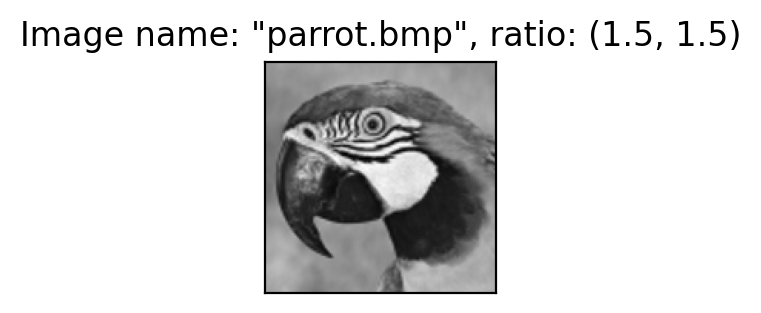

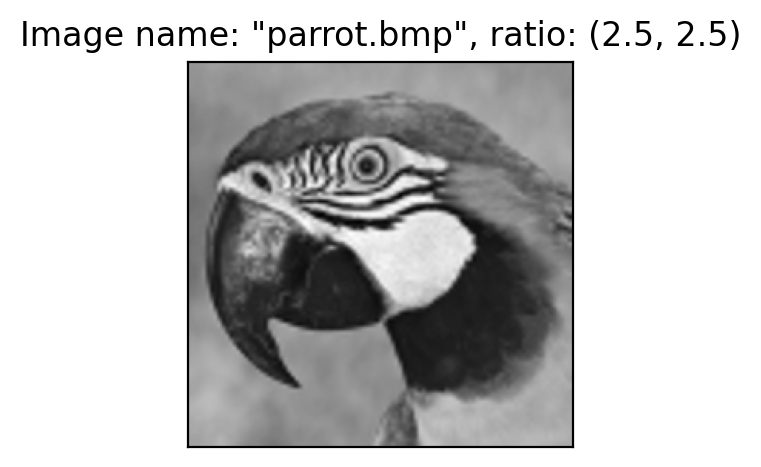

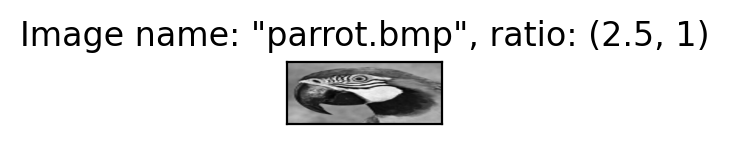

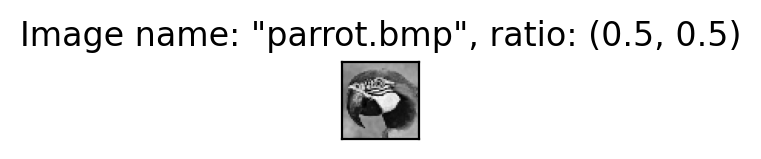

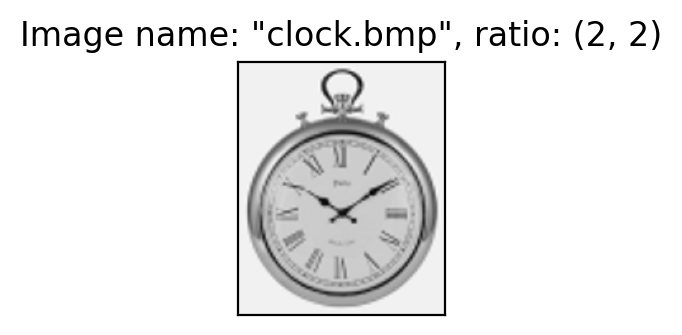

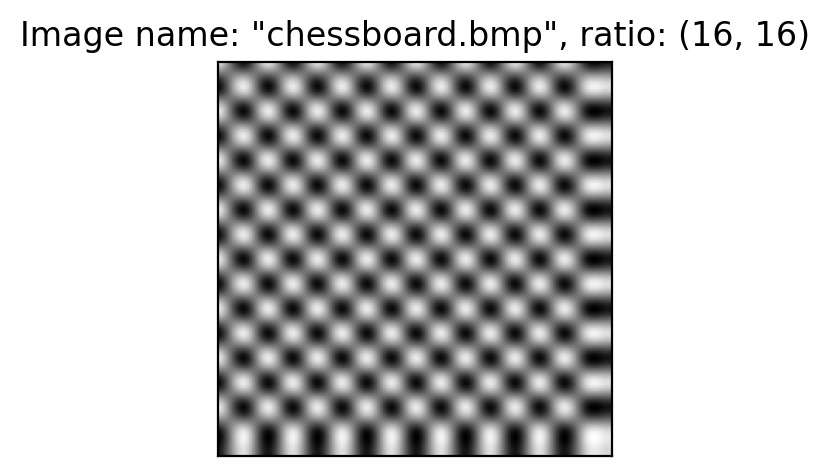

In [4]:
parameters = [
  ("parrot.bmp",     (1.5, 1.5)),
  ("parrot.bmp",     (2.5, 2.5)),
  ("parrot.bmp",     (2.5, 1  )),
  ("parrot.bmp",     (0.5, 0.5)),
  ("clock.bmp",      (2,   2  )),
  ("chessboard.bmp", (16,  16)),
]

for filename, ratio in parameters:
  image = cv2.imread(filename, cv2.IMREAD_GRAYSCALE)
  image_rescaled = interpolate_bicubic(image, ratio)
  show_image(image_rescaled, f"Image name: \"{filename}\", ratio: {ratio}")